Import libraries

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator, DayLocator, MONDAY

import seaborn as sns
sns.set_style('whitegrid')
import seaborn as sns; sns.set()

import datetime
from datetime import date, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

Download 3 Stocks I am currently holding, Eli Lilly, Merck and Novo Nordisk

In [16]:
stocks = yf.download("LLY MRK NVO", start=datetime.datetime(2017, 1, 1), 
         end=datetime.datetime(2023, 7, 31), group_by='tickers')

stocks.head(10)

[*********************100%***********************]  3 of 3 completed


NVO                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2017-01-03  36.230000  36.299999  35.720001  35.919998  31.453875  4722900   
2017-01-04  36.119999  36.290001  35.939999  36.180000  31.681551  2571900   
2017-01-05  36.790001  37.080002  36.660000  37.060001  32.452133  2401900   
2017-01-06  36.759998  36.779999  36.490002  36.639999  32.084354  2613700   
2017-01-09  36.389999  36.610001  36.160000  36.500000  31.961761  1862300   
2017-01-10  36.130001  36.290001  36.009998  36.009998  31.532686  1541000   
2017-01-11  35.830002  36.029999  35.209999  35.619999  31.191175  2211000   
2017-01-12  34.930000  35.369999  34.840000  35.259998  30.875935  2207800   
2017-01-13  35.759998  35.950001  35.560001  35.730000  31.287500  2314500   
2017-01-17  36.349998  36.389999  35.810001  36.200001  31.699062  2503900   

                  MRK                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2017-01-03  56.440842  57.614506  56.345421  57.395039  47.018497  12564158   
2017-01-04  57.729008  58.005726  57.290077  57.375954  47.002869   9863671   
2017-01-05  57.461830  57.805344  57.251907  57.356869  46.987228  10581446   
2017-01-06  57.337788  57.690842  56.803436  57.509541  47.112305  10730053   
2017-01-09  57.538170  58.664124  57.328243  58.301525  47.761105  10201861   
2017-01-10  58.396946  58.435116  57.146946  57.175571  46.838718  16036706   
2017-01-11  59.484734  60.267178  57.967556  58.807251  48.175400  34281862   
2017-01-12  59.666031  60.343510  59.274811  59.360687  48.628769  26079899   
2017-01-13  59.475189  59.809158  59.255726  59.484734  48.730400  10447617   
2017-01-17  59.083969  59.227100  58.396946  58.664124  48.058144  11101150   

                  LLY                                                        
                 Open       High        Low      Close  Adj Close    Volume  
Date                                                                         
2017-01-03  73.940002  74.669998  73.540001  74.599998  65.546425   3622700  
2017-01-04  74.949997  75.000000  74.379997  74.720001  65.651886   3021600  
2017-01-05  74.930000  77.870003  74.430000  75.589996  66.416267   3310800  
2017-01-06  75.459999  76.070000  75.029999  75.669998  66.486565   2296500  
2017-01-09  75.669998  76.620003  75.510002  76.269997  67.013756   3204100  
2017-01-10  76.440002  76.559998  75.809998  76.269997  67.013756   3559400  
2017-01-11  76.510002  76.919998  74.000000  75.260002  66.126320   7701700  
2017-01-12  74.849998  77.500000  74.760002  77.150002  67.786972  11900700  
2017-01-13  76.919998  78.120003  76.379997  77.400002  68.006630   5602600  
2017-01-17  77.059998  77.059998  75.870003  76.849998  67.523354   4913300

Showing the distribution of the data

In [17]:
stocks.describe()

NVO                                                      \
              Open         High          Low        Close    Adj Close   
count  1653.000000  1653.000000  1653.000000  1653.000000  1653.000000   
mean     74.942142    75.511984    74.403993    74.984834    71.849738   
std      34.352399    34.662800    34.077666    34.404204    35.312275   
min      33.110001    33.200001    32.830002    32.980000    28.879423   
25%      48.919998    49.240002    48.700001    48.939999    44.973030   
50%      63.290001    63.680000    62.840000    63.330002    59.935234   
75%     101.970001   103.230003   101.419998   102.449997    99.738525   
max     171.050003   172.970001   170.250000   172.649994   171.823761   

                             MRK                                         \
             Volume         Open         High          Low        Close   
count  1.653000e+03  1653.000000  1653.000000  1653.000000  1653.000000   
mean   1.475361e+06    76.853531    77.533090    76.167760    76.861211   
std    8.340477e+05    15.389150    15.552103    15.223054    15.418704   
min    2.775000e+05    50.896946    51.669846    50.410305    50.830154   
25%    9.524000e+05    65.238548    65.782440    64.284348    65.448471   
50%    1.245600e+06    76.419998    77.022903    75.677483    76.360001   
75%    1.752800e+06    82.118324    82.824425    81.354965    82.050003   
max    6.922300e+06   118.349998   119.650002   117.930000   118.379997   

                                          LLY                            \
         Adj Close        Volume         Open         High          Low   
count  1653.000000  1.653000e+03  1653.000000  1653.000000  1653.000000   
mean     70.243489  1.081696e+07   181.631718   183.696981   179.697725   
std      17.968577  5.534536e+06   102.442656   103.682534   101.229692   
min      43.218010  2.343223e+06    73.940002    74.669998    73.540001   
25%      56.353680  7.693578e+06   104.989998   105.699997   104.169998   
50%      69.504120  9.731900e+06   142.289993   144.000000   140.570007   
75%      76.075775  1.241492e+07   255.110001   259.369995   254.389999   
max     117.594315  1.024973e+08   468.510010   469.869995   464.000000   

                                               
             Close    Adj Close        Volume  
count  1653.000000  1653.000000  1.653000e+03  
mean    181.783582   175.305516  4.103084e+06  
std     102.531696   104.549081  4.779425e+06  
min      74.209999    65.528847  6.272000e+05  
25%     105.110001    96.661995  2.472200e+06  
50%     142.380005   135.938583  3.196200e+06  
75%     255.990005   250.465408  4.349200e+06  
max     468.980011   467.976837  7.482250e+07

Show how many days of trading

In [18]:
stocks.shape

(1653, 18)

Dataframe which contain Adjusted Close price for each company

In [19]:
adj_close = pd.DataFrame()

In [20]:
tickers = ['NVO', 'LLY', 'MRK']
for ticker in tickers:
    adj_close[ticker] = stocks[ticker]['Adj Close']

adj_close

,NVO,LLY,MRK
Date,,,
2017-01-03,31.453875,65.546425,47.018497
2017-01-04,31.681551,65.651886,47.002869
2017-01-05,32.452133,66.416267,46.987228
2017-01-06,32.084354,66.486565,47.112305
2017-01-09,31.961761,67.013756,47.761105
...,...,...,...
2023-07-24,161.294403,458.337494,108.790001
2023-07-25,161.533249,456.561310,107.529999
2023-07-26,157.522537,452.619751,107.139999


Plot Adjusted Close price for all stocks

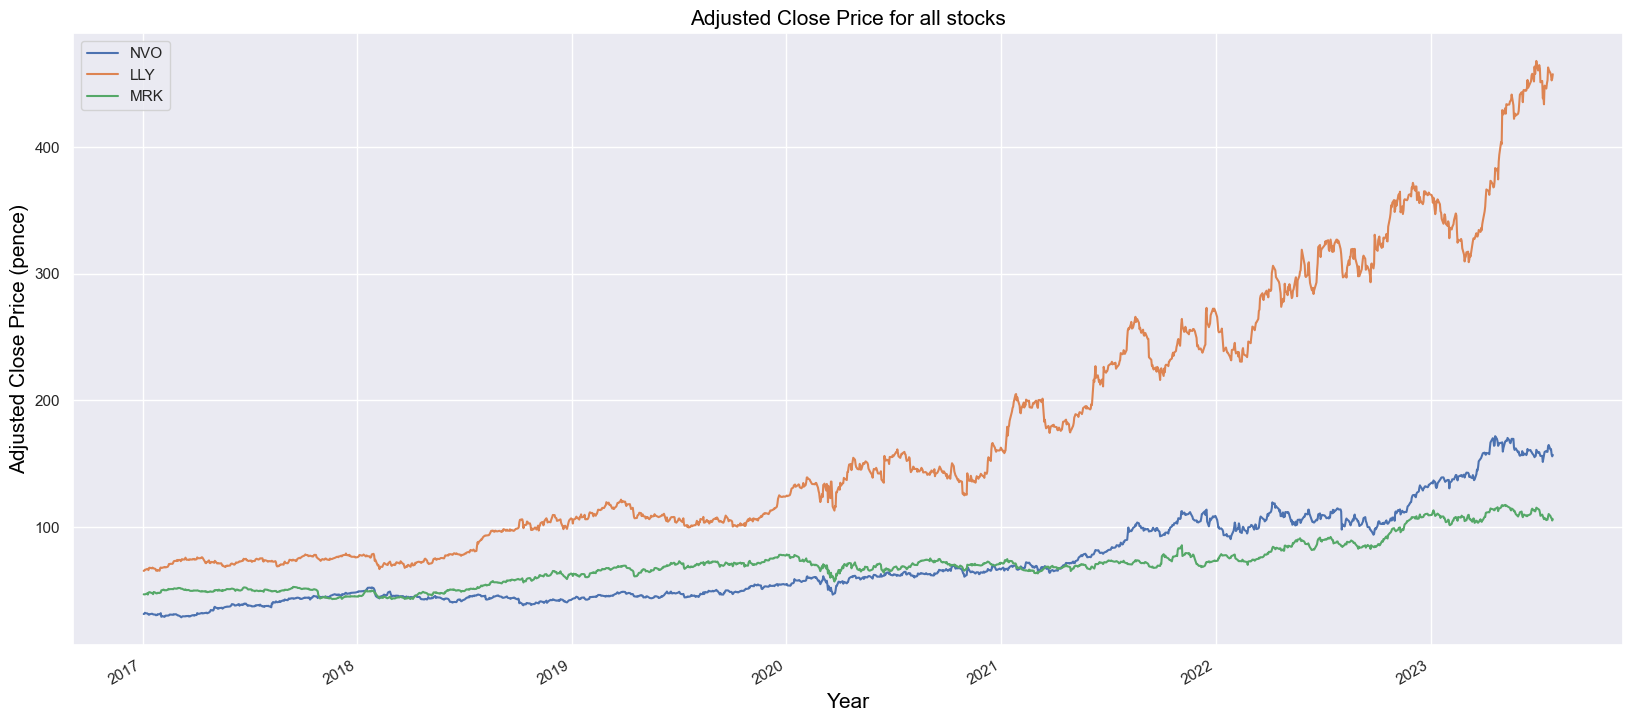

In [22]:
adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(20, 9)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 15)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15);
     

In [23]:
# Transform data using lambda function to plot stocks' returns

returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()

,NVO,LLY,MRK
Date,,,
2017-01-03,1.000000,1.000000,1.000000
2017-01-04,1.007238,1.001609,0.999668
2017-01-05,1.031737,1.013271,0.999335
2017-01-06,1.020045,1.014343,1.001995
2017-01-09,1.016147,1.022386,1.015794


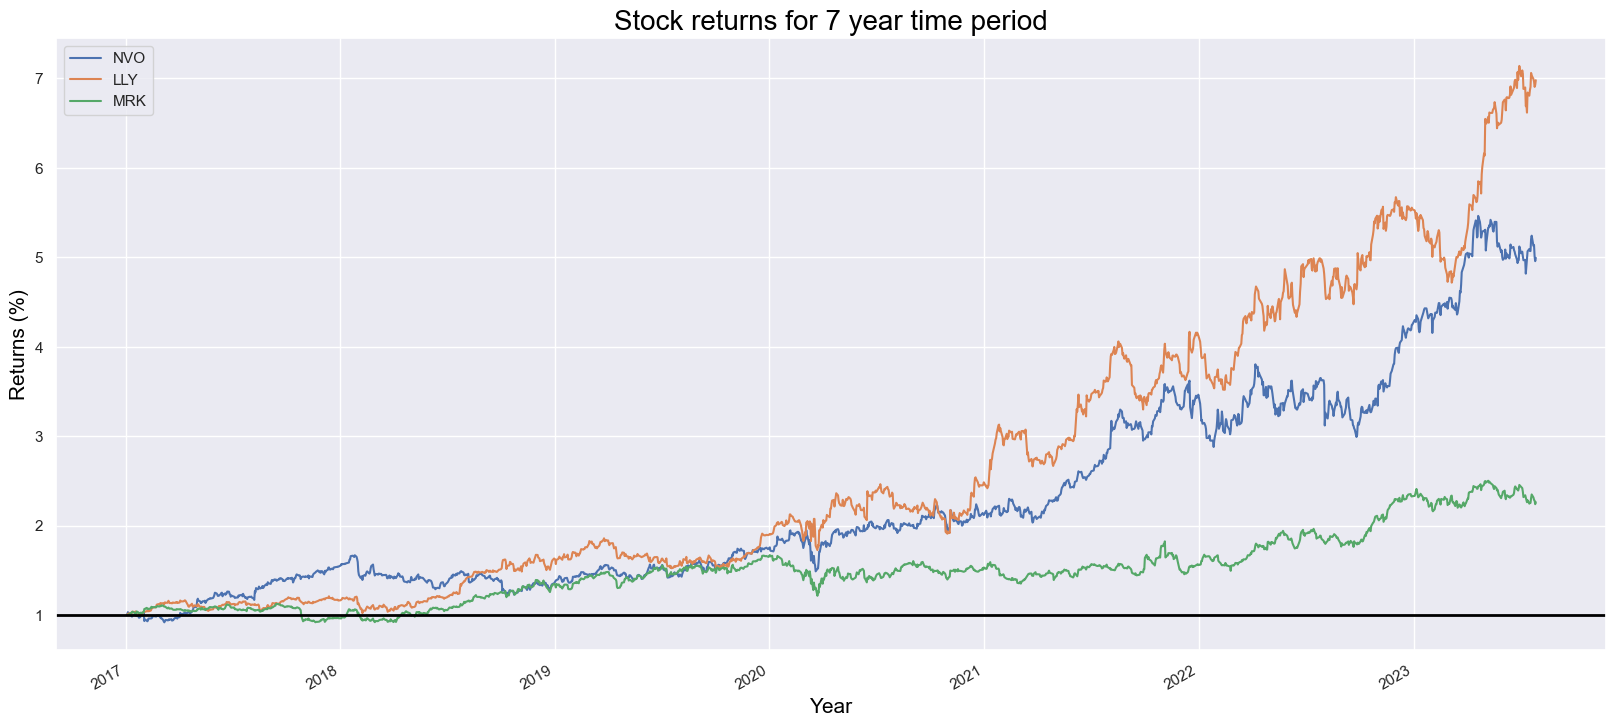

In [24]:
# Plot to show how profitable each stock was throughout the time period

returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 7 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);


Compute the correlations between every pair of stocks

In [25]:
correlation_matrix = adj_close.corr() 
correlation_matrix

,NVO,LLY,MRK
NVO,1.000000,0.973459,0.904066
LLY,0.973459,1.000000,0.916744
MRK,0.904066,0.916744,1.000000


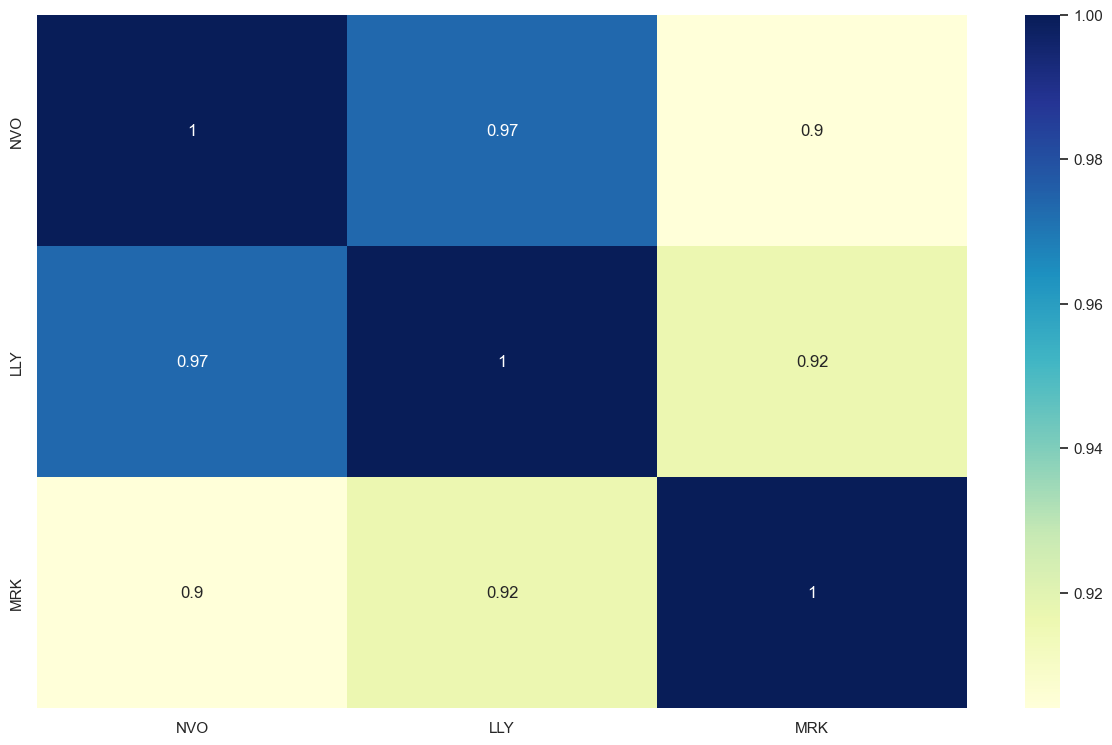

In [26]:
sns.heatmap(adj_close.corr(), annot=True, cmap="YlGnBu");